## Flow Analysis Tool: A demo 

FAT, Flow Analysis Tool, is a toolbox that can be used to post-process two and three dimensional simulation data from OpenFOAM. It is mainly focused on high-level manipulation of velocity vector fields, and specifically on order reduction and modelling. In this notebook, the usage and capabilities of the FAT toolbox is demonstrated on a test problem, the flow in a lid-driven cavity.

We import some modules useful later

In [1]:
using PyPlot

### Meshes 

We start by importing the `Meshes` submodule, which manages the mesh loading and manipulation

In [2]:
using FAT.Meshes

We now load an example mesh, which in this case is a mesh composed of hexahdral cells only. At the moment we only support this kind of meshes.

In [3]:
msh = HexaMesh("ldc_large/")

Hexahedral mesh object at 1742125097250377652:  
  ~ 32300 cells                 
  ~ 65322 points               
  ~ 129560 total faces           
  ~ 65320 boundary faces
  ~ 4 patches: 
    ~ movingWall: 190 faces
    ~ front: 32300 faces
    ~ back: 32300 faces
    ~ fixedWalls: 530 faces


Some properties of the mesh are displayed and these can be also obtained from specific methods.

In [4]:
for method in [ncells, npoints, nfaces, nboundaryfaces, ninternalfaces, npatches]
    println(string(method), " = ", method(msh))
end

FAT.Meshes.ncells = 

The coordinates of the cell centres can be obtained with:

In [5]:
x, y, z = cellcentres(msh);

These are useful mainly for plotting, e.g.:

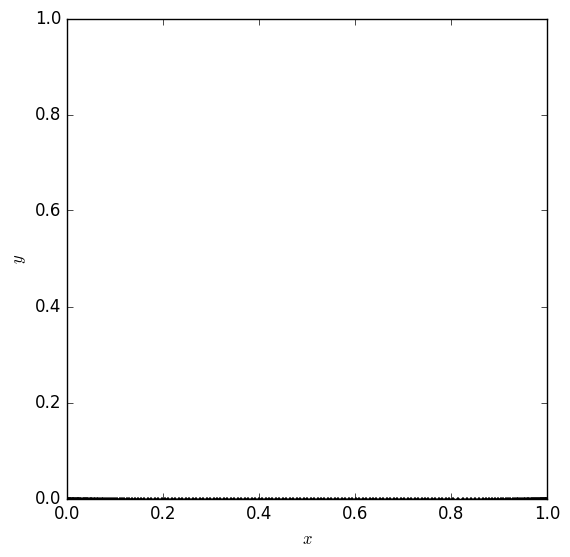

In [6]:
plot(x, y, "k.", ms=3)
xlabel(L"$x$")
ylabel(L"$y$")
xlim(0, 1)
ylim(0, 1)
gca()[:set_aspect](1)

### Patches 

Patches can be found in the dictionary

In [7]:
patches(msh)

32300
FAT.Meshes.npoints = 65322
FAT.Meshes.nfaces = 129560
FAT.Meshes.nboundaryfaces = 65320
FAT.Meshes.ninternalfaces = 64240
FAT.Meshes.npatches = 4


Dict{Symbol,FAT.Meshes.Patch} with 4 entries:
  :movingWall => Patch 'movingWall': first face ID 64241, last face ID 64430, #…
  :front      => Patch 'front': first face ID 64961, last face ID 97260, #faces…
  :back       => Patch 'back': first face ID 97261, last face ID 129560, #faces…
  :fixedWalls => Patch 'fixedWalls': first face ID 64431, last face ID 64960, #…

Each patch has specific methods that are used mainly in the library and are probably not needed in user code. For example to get a specific patch we use:

In [21]:
top = patch(msh, :movingWall)

Patch 'movingWall': first face ID 64241, last face ID 64430, #faces 190


In [22]:
for method in [patchname, firstfaceID, lastfaceID, nfaces]
    println(string(method), " = ", method(top))
end

FAT.Meshes.patchname = movingWall
FAT.Meshes.firstfaceID = 64241
FAT.Meshes.lastfaceID = 64430
FAT.Meshes.nfaces = 190


### Cells

A vector of cells can be obtained as:

In [10]:
cls = cells(msh);

Each cells has some useful methods:

In [11]:
for method in [volume, centre, facesIDs]
    println(string(method), " = ", method(cls[1]))
end

FAT.Meshes.volume = 

### Faces

In [23]:
fcs = faces(msh);

In [25]:
xb, yb, zb = Float64[], Float64[], Float64[]
for face in boundaryfaces(msh)
    push!(xb, centre(face).x)
    push!(yb, centre(face).y)
    push!(zb, centre(face).z)
end

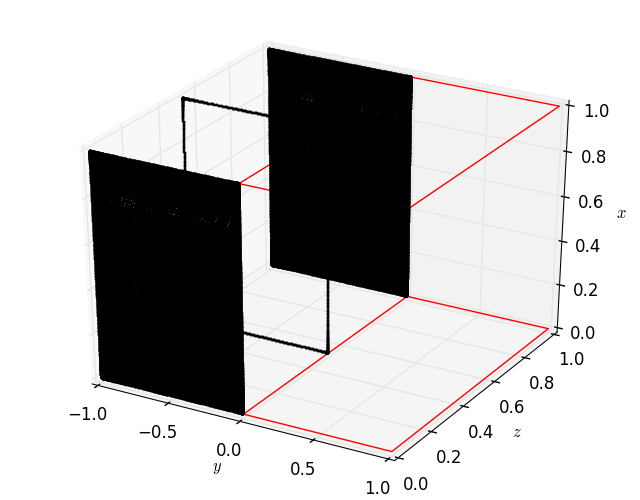

PyObject <matplotlib.text.Text object at 0x317707850>

In [26]:
plot3D([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], 
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], 
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], "r")
plot3D(yb, zb, xb, "k.", ms=3)
xlabel(L"$y$")
ylabel(L"$z$")
zlabel(L"$x$")

#### Loading simulation data

In [27]:
using FAT.Utils

In [30]:
OpenFoamToHDF5("ldc_large/"; overwrite=true, fielddtype=Float32)

In [31]:
using FAT.Simulations

In [32]:
sim = SimulationData("ldc_large/")

OpenFOAM simulation object at /Users/davide/Dropbox/Codes/FAT/tests/ldc_large/data.h5 at 8998394232086452107: 
  ~ 600 snapshots available: [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0  …  295.5,296.0,296.5,297.0,297.5,298.0,298.5,299.0,299.5,300.0]
  ~ Hexahedral mesh object at 14430034830143300740:  
    ~ 32300 cells                 
    ~ 65322 points               
    ~ 129560 total faces           
    ~ 65320 boundary faces
    ~ 4 patches: 
      ~ movingWall: 190 faces
      ~ front: 32300 faces
      ~ back: 32300 faces
      ~ fixedWalls: 530 faces


In [33]:
u = sim[100.0, :U];

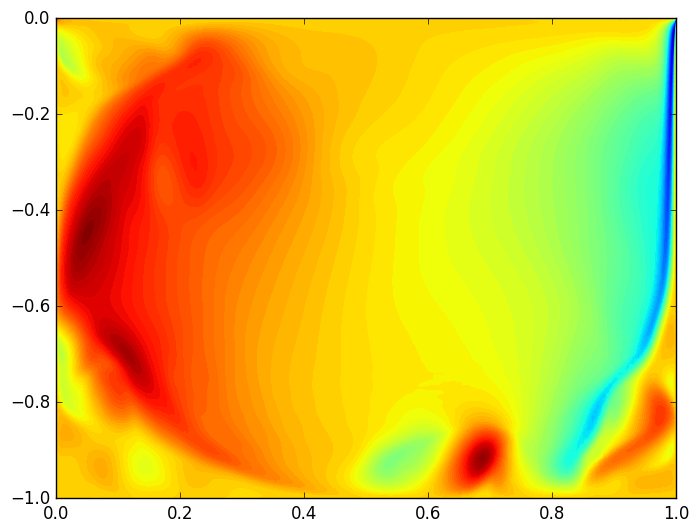

PyObject <matplotlib.tri.tricontour.TriContourSet object at 0x31b274bd0>

In [34]:
tricontourf(x, y, u.scalars[2].internalField, 100)

In [36]:
FAT.Fields.curl(u)

LoadError: LoadError: MethodError: `start` has no method matching start(::Type{Float64})
while loading In[36], in expression starting on line 1